In [35]:
import sys
sys.path.append('../../Share/')
sys.path.append('../')

import self_supervised_v1
import matplotlib.pyplot as plt
import baseline, config

import warnings
warnings.filterwarnings('ignore')

SUBJECT = "Harold"
Threshold_K = 1
trainer = baseline.ModelTrainer(config, subject=SUBJECT)
trainer_Carlson = baseline.ModelTrainer(config, subject="Carlson")
#trainer_Harold = baseline.ModelTrainer(config, subject="Harold")
trainer_Hunmin = baseline.ModelTrainer(config, subject="Hunmin")
trainer_Brian = baseline.ModelTrainer(config, subject="Brian")
trainer_Xianyu = baseline.ModelTrainer(config, subject="Xianyu")

# 초기 학습 데이터
X_init, y_init, X_init_test, y_init_test = trainer.return_until_K_data(K=Threshold_K, train_ratio=0.8)
print(X_init.shape, y_init.shape, X_init_test.shape, y_init_test.shape)

Dataset 1/18 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
(6904, 4, 14, 1) (6904,) (1726, 4, 14, 1) (1726,)


In [30]:
# 모델 생성 및 초기 학습
model = self_supervised_v1.build_model()
result = model.fit(X_init, y_init, validation_data=(X_init_test, y_init_test), epochs=100, batch_size=64, verbose=0)

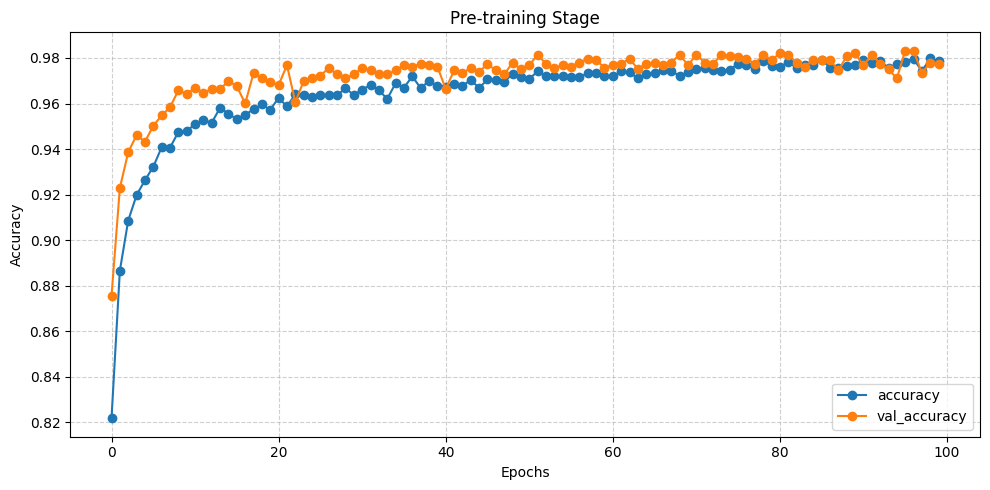

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(result.history['accuracy'], label='accuracy', marker='o')
plt.plot(result.history['val_accuracy'], label='val_accuracy', marker='o')
plt.title('Pre-training Stage')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [32]:
final_session = len(config.Info_sub_H2)
# Accuracy 저장 리스트
Same_Session_Test_Acc, Next_Session_Test_Acc = [], []
Unseen_subject_acc_dict = {"H": [], "C": [], "B": [], "X": []}
trainers_unseen = {
    "H": trainer_Hunmin,
    "C": trainer_Carlson,
    "B": trainer_Brian,
    "X": trainer_Xianyu,
}

def evaluate_model(model, data, labels):
    return model.evaluate(data, labels, verbose=0)[1]

# 온라인 학습 루프
for session in range(Threshold_K, final_session-1):
    # 현재 세션 데이터
    X_train, _, X_test, y_test = trainer.return_K_th_data_only(K=session, train_ratio=0.8)

    # Pseudo-label 생성 및 온라인 업데이트
    pseudo_labels = self_supervised_v1.generate_pseudo_label(model, X_train)
    model = self_supervised_v1.online_update(model, X_train, pseudo_labels)

    # 같은 세션 테스트
    Same_Session_Test_Acc.append(evaluate_model(model, X_test, y_test))

    # 다음 세션 테스트
    next_X, next_y, _, _ = trainer.return_K_th_data_only(K=session + 1, train_ratio=0.8)
    Next_Session_Test_Acc.append(evaluate_model(model, next_X, next_y))

    # Unseen subject 테스트
    for key, trainer_sub in trainers_unseen.items():
        unseen_X, unseen_y, _, _ = trainer_sub.return_until_K_data(K=10, train_ratio=0.8)
        acc = evaluate_model(model, unseen_X, unseen_y)
        Unseen_subject_acc_dict[key].append(acc)

Returning K-th session data: Exp_2025-07-09-v2/E9AD0E7DCC2B/
Returning K-th session data: Exp_2025-07-10-v1/E9AD0E7DCC2B/
Dataset 1/66 - Session Exp_2025-05-27/E8331D05289A/
Dataset 2/66 - Session Exp_2025-06-18/E9AD0E7DCC2B/
Dataset 3/66 - Session Exp_2025-06-20-v1/E9AD0E7DCC2B/
Dataset 4/66 - Session Exp_2025-06-20-v2/E9AD0E7DCC2B/
Dataset 5/66 - Session Exp_2025-06-20-v3/E9AD0E7DCC2B/
Dataset 6/66 - Session Exp_2025-06-20-v4/E9AD0E7DCC2B/
Dataset 7/66 - Session Exp_2025-06-20-v5/E9AD0E7DCC2B/
Dataset 8/66 - Session Exp_2025-06-20-v6/E9AD0E7DCC2B/
Dataset 9/66 - Session Exp_2025-06-20-v7/E9AD0E7DCC2B/
Dataset 10/66 - Session Exp_2025-06-20-v8/E9AD0E7DCC2B/
Dataset 1/18 - Session Exp_2025-06-30-v1/E9AD0E7DCC2B/
Dataset 2/18 - Session Exp_2025-06-30-v2/E9AD0E7DCC2B/
Dataset 3/18 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Dataset 4/18 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Dataset 5/18 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
Dataset 6/18 - Session Exp_2025-07-10-v2/E9AD0E7DCC2B/
Dat

In [ ]:
H2_Same_Session_Test_Acc = [0.9527696967124939,  0.9007545113563538, 0.8796296119689941, 0.857559859752655, 0.8979710340499878, 0.8807179927825928, 0.8895953893661499, 0.8776102066040039, 0.9107246398925781, 0.9205336570739746, 0.9078794717788696, 0.9189345836639404, 0.9061413407325745]

H2_Next_Session_Test_Acc = [0.9026690125465393, 0.8842592835426331, 0.865022599697113, 0.9027677178382874, 0.8795599341392517, 0.8928881287574768,
 0.8927225470542908, 0.9121739268302917, 0.9093809127807617, 0.9041135311126709, 0.918789803981781, 0.9109340906143188, 0.8969688415527344]


H2_Same_Session_Test_Acc_K2 = [0.8335266709327698, 0.8047508597373962, 0.7854227423667908, 0.7742310166358948, 0.7957175970077515, 0.7583187222480774, 0.8121739029884338, 0.7990735173225403, 0.7670519948005676, 0.8207656741142273, 0.8301449418067932, 0.7946635484695435, 0.8250289559364319, 0.8048639297485352, 0.8377752304077148]
H2_Next_Session_Test_Acc_K2 = [0.8067786693572998, 0.801895022392273, 0.7708151936531067, 0.7897858619689941, 0.7656500935554504, 0.8203158974647522, 0.7940069437026978, 0.7788378000259399, 0.8080602884292603, 0.8297101259231567, 0.8015078902244568, 0.8232908248901367, 0.8090619444847107, 0.8393917679786682, 0.8284756541252136]


In [33]:
Next_Session_Test_Acc

[0.803392767906189,
 0.7799826264381409,
 0.8096209764480591,
 0.8217290639877319,
 0.7727141380310059,
 0.7633153200149536,
 0.8011882305145264,
 0.7892298698425293,
 0.8236484527587891,
 0.830965518951416,
 0.8149275183677673,
 0.8255763649940491,
 0.8399478793144226,
 0.823103666305542,
 0.8485155701637268,
 0.8318274617195129]

In [34]:
Same_Session_Test_Acc

[0.9375,
 0.80800461769104,
 0.7653534412384033,
 0.8244897723197937,
 0.8107951283454895,
 0.7627314925193787,
 0.771161675453186,
 0.8017391562461853,
 0.7857556343078613,
 0.8254335522651672,
 0.8317865133285522,
 0.8092753887176514,
 0.8346867561340332,
 0.8354576826095581,
 0.8158656358718872,
 0.8377752304077148]

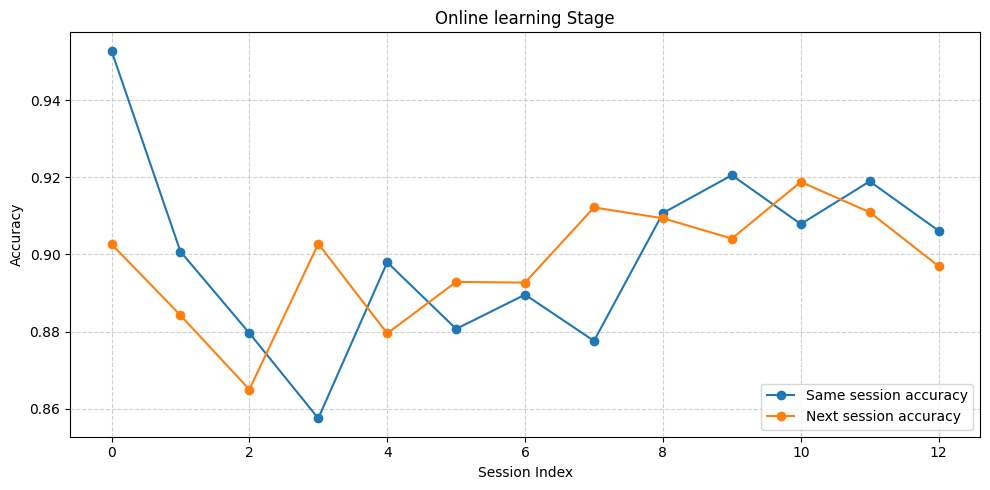

In [7]:
#K4
plt.figure(figsize=(10, 5))
plt.plot(Same_Session_Test_Acc, label='Same session accuracy', marker='o')
plt.plot(Next_Session_Test_Acc, label='Next session accuracy', marker='o')
plt.title('Online learning Stage')
plt.xlabel('Session Index')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

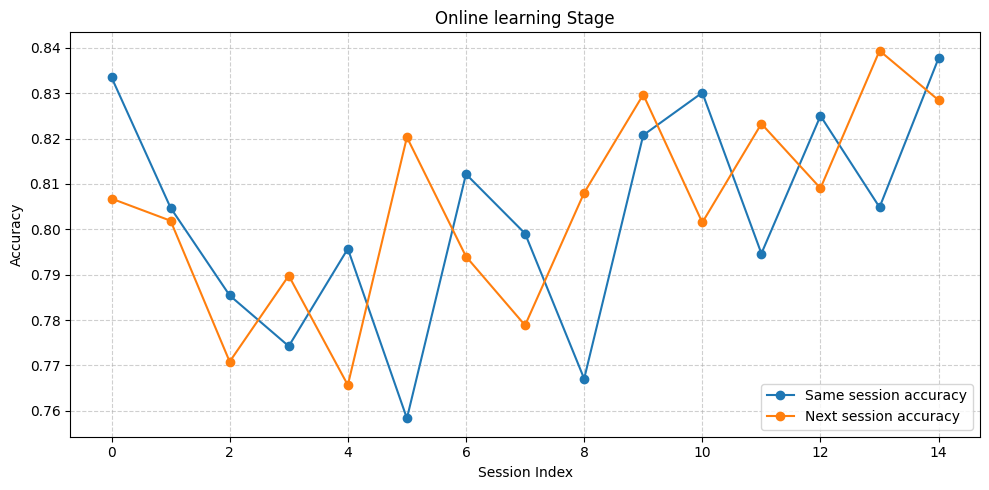

In [17]:
#K2
plt.figure(figsize=(10, 5))
plt.plot(Same_Session_Test_Acc, label='Same session accuracy', marker='o')
plt.plot(Next_Session_Test_Acc, label='Next session accuracy', marker='o')
plt.title('Online learning Stage')
plt.xlabel('Session Index')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

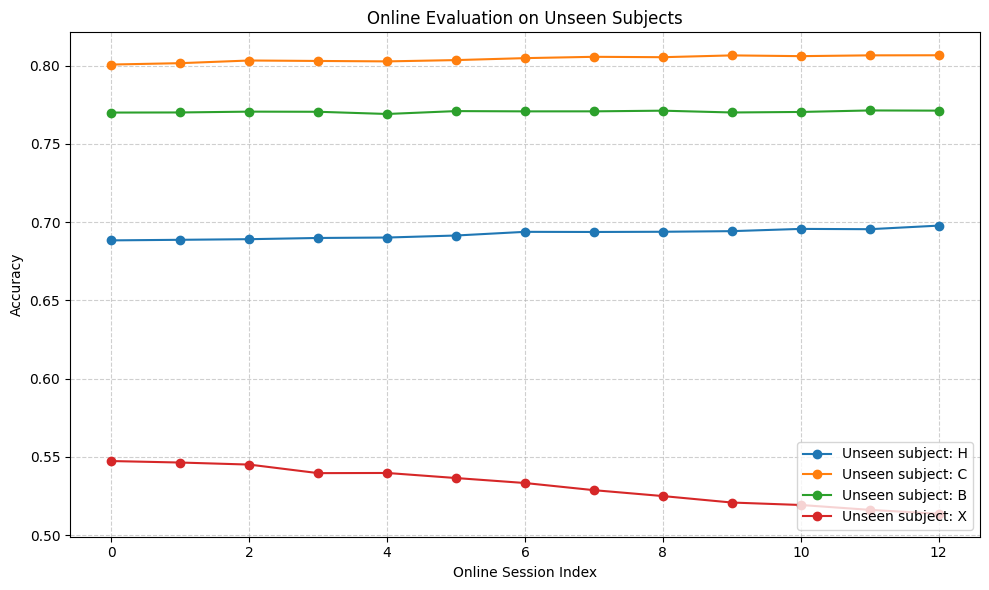

In [8]:
plt.figure(figsize=(10, 6))
for subject, acc_list in Unseen_subject_acc_dict.items():
    plt.plot(acc_list, label=f'Unseen subject: {subject}', marker='o')

plt.title('Online Evaluation on Unseen Subjects')
plt.xlabel('Online Session Index')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [38]:
Threshold_K = 8  # 초기 학습 데이터
X_init, y_init, X_init_test, y_init_test = trainer.return_until_K_data(K=Threshold_K, train_ratio=0.8)
model_K8 = self_supervised_v1.build_model()  # 모델 생성 및 초기 학습
result = model_K8.fit(X_init, y_init, validation_data=(X_init_test, y_init_test), epochs=100, batch_size=64, verbose=0)

Dataset 1/18 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
ERROR! Session/line number was not unique in database. History logging moved to new session 3762
Dataset 2/18 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Dataset 3/18 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
Dataset 4/18 - Session Exp_2025-07-10-v2/E9AD0E7DCC2B/
Dataset 5/18 - Session Exp_2025-07-11-v1/E9AD0E7DCC2B/
Dataset 6/18 - Session Exp_2025-07-11-v2/E9AD0E7DCC2B/
Dataset 7/18 - Session Exp_2025-07-16-v1/E9AD0E7DCC2B/
Dataset 8/18 - Session Exp_2025-07-16-v2/E9AD0E7DCC2B/


In [39]:
Threshold_K = 10  # 초기 학습 데이터
X_init, y_init, X_init_test, y_init_test = trainer.return_until_K_data(K=Threshold_K, train_ratio=0.8)
model_K10 = self_supervised_v1.build_model()  # 모델 생성 및 초기 학습
result = model_K10.fit(X_init, y_init, validation_data=(X_init_test, y_init_test), epochs=100, batch_size=64, verbose=0)

Dataset 1/18 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Dataset 2/18 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Dataset 3/18 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
Dataset 4/18 - Session Exp_2025-07-10-v2/E9AD0E7DCC2B/
Dataset 5/18 - Session Exp_2025-07-11-v1/E9AD0E7DCC2B/
Dataset 6/18 - Session Exp_2025-07-11-v2/E9AD0E7DCC2B/
Dataset 7/18 - Session Exp_2025-07-16-v1/E9AD0E7DCC2B/
Dataset 8/18 - Session Exp_2025-07-16-v2/E9AD0E7DCC2B/
Dataset 9/18 - Session Exp_2025-07-17-v1/E9AD0E7DCC2B/
Dataset 10/18 - Session Exp_2025-07-17-v2/E9AD0E7DCC2B/


In [41]:
model = model_K8
Threshold_K = 8

final_session = len(config.Info_sub_X)
# Accuracy 저장 리스트
Same_Session_Test_Acc, Next_Session_Test_Acc = [], []
Unseen_subject_acc_dict = {"H": [], "H2": [], "B": [], "C": []}
trainers_unseen = {
    "H": trainer_Hunmin,
    #"H2": trainer_Harold,
    "B": trainer_Brian,
    "X": trainer_Xianyu,
    "C": trainer_Carlson,
}

def evaluate_model(model, data, labels):
    return model.evaluate(data, labels, verbose=0)[1]

for session in range(Threshold_K, final_session-1):
    X_train, _, X_test, y_test = trainer.return_K_th_data_only(K=session, train_ratio=0.8)

    pseudo_labels = self_supervised_v1.generate_pseudo_label(model, X_train)
    model = self_supervised_v1.online_update(model, X_train, pseudo_labels)
    Same_Session_Test_Acc.append(evaluate_model(model, X_test, y_test))
    next_X, next_y, _, _ = trainer.return_K_th_data_only(K=session + 1, train_ratio=0.8)
    Next_Session_Test_Acc.append(evaluate_model(model, next_X, next_y))

Returning K-th session data: Exp_2025-07-17-v1/E9AD0E7DCC2B/
Returning K-th session data: Exp_2025-07-17-v2/E9AD0E7DCC2B/
Returning K-th session data: Exp_2025-07-17-v2/E9AD0E7DCC2B/
Returning K-th session data: Exp_2025-07-23-v1/E9AD0E7DCC2B/
Returning K-th session data: Exp_2025-07-23-v1/E9AD0E7DCC2B/
Returning K-th session data: Exp_2025-07-23-v2/E9AD0E7DCC2B/
Returning K-th session data: Exp_2025-07-23-v2/E9AD0E7DCC2B/
Returning K-th session data: Exp_2025-07-24-v1/E9AD0E7DCC2B/
Returning K-th session data: Exp_2025-07-24-v1/E9AD0E7DCC2B/
Returning K-th session data: Exp_2025-07-24-v2/E9AD0E7DCC2B/
Returning K-th session data: Exp_2025-07-24-v2/E9AD0E7DCC2B/
Returning K-th session data: Exp_2025-07-25-v1/E9AD0E7DCC2B/
Returning K-th session data: Exp_2025-07-25-v1/E9AD0E7DCC2B/
Returning K-th session data: Exp_2025-07-25-v2/E9AD0E7DCC2B/
Returning K-th session data: Exp_2025-07-25-v2/E9AD0E7DCC2B/
Returning K-th session data: Exp_2025-08-01-v1/E9AD0E7DCC2B/
Returning K-th session d

In [42]:
#k8
Same_Session_Test_Acc

[0.9321739077568054,
 0.9386218786239624,
 0.9416185021400452,
 0.9402552247047424,
 0.9246376752853394,
 0.9367749691009521,
 0.9385863542556763,
 0.9542559385299683,
 0.9669756889343262]

In [43]:
#k8
Next_Session_Test_Acc

[0.9400694966316223,
 0.9391442537307739,
 0.9415772557258606,
 0.9302898645401001,
 0.9395389556884766,
 0.9352549314498901,
 0.9559930562973022,
 0.9604634046554565,
 0.9551151394844055]

In [44]:
model = model_K10
Threshold_K = 10

final_session = len(config.Info_sub_X)
# Accuracy 저장 리스트
Same_Session_Test_Acc, Next_Session_Test_Acc = [], []
Unseen_subject_acc_dict = {"H": [], "H2": [], "B": [], "C": []}
trainers_unseen = {
    "H": trainer_Hunmin,
    #"H2": trainer_Harold,
    "B": trainer_Brian,
    "X": trainer_Xianyu,
    "C": trainer_Carlson,
}

def evaluate_model(model, data, labels):
    return model.evaluate(data, labels, verbose=0)[1]

for session in range(Threshold_K, final_session-1):
    X_train, _, X_test, y_test = trainer.return_K_th_data_only(K=session, train_ratio=0.8)

    pseudo_labels = self_supervised_v1.generate_pseudo_label(model, X_train)
    model = self_supervised_v1.online_update(model, X_train, pseudo_labels)
    Same_Session_Test_Acc.append(evaluate_model(model, X_test, y_test))
    next_X, next_y, _, _ = trainer.return_K_th_data_only(K=session + 1, train_ratio=0.8)
    Next_Session_Test_Acc.append(evaluate_model(model, next_X, next_y))


Returning K-th session data: Exp_2025-07-23-v1/E9AD0E7DCC2B/
Returning K-th session data: Exp_2025-07-23-v2/E9AD0E7DCC2B/
Returning K-th session data: Exp_2025-07-23-v2/E9AD0E7DCC2B/
Returning K-th session data: Exp_2025-07-24-v1/E9AD0E7DCC2B/
Returning K-th session data: Exp_2025-07-24-v1/E9AD0E7DCC2B/
Returning K-th session data: Exp_2025-07-24-v2/E9AD0E7DCC2B/
Returning K-th session data: Exp_2025-07-24-v2/E9AD0E7DCC2B/
Returning K-th session data: Exp_2025-07-25-v1/E9AD0E7DCC2B/
Returning K-th session data: Exp_2025-07-25-v1/E9AD0E7DCC2B/
Returning K-th session data: Exp_2025-07-25-v2/E9AD0E7DCC2B/
Returning K-th session data: Exp_2025-07-25-v2/E9AD0E7DCC2B/
Returning K-th session data: Exp_2025-08-01-v1/E9AD0E7DCC2B/
Returning K-th session data: Exp_2025-08-01-v1/E9AD0E7DCC2B/
Returning K-th session data: Exp_2025-08-01-v2/E9AD0E7DCC2B/


In [45]:
#k10
Same_Session_Test_Acc

[0.9456647634506226,
 0.9582366347312927,
 0.9431884288787842,
 0.9448955655097961,
 0.9368482232093811,
 0.9612044095993042,
 0.946118175983429]

In [46]:
#k10
Next_Session_Test_Acc

[0.9624528884887695,
 0.9427536129951477,
 0.9517181515693665,
 0.9410486817359924,
 0.9694557189941406,
 0.9475741982460022,
 0.9586126208305359]